In [77]:
# RealEstateAI Solutions
# Autore: Rosa Santelia

In [78]:
# Caricamento e preprocessamento dei dati sui prezzi immobiliari

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/housing.csv'
df = pd.read_csv(url)
df.head()
RANDOM_SEED=0

In [79]:
# Gestione dei valori mancanti, codifica delle variabili categoriche e normalizzazione/scalatura dei dati

df.shape


(545, 13)

In [80]:
# Visualizzo le informazioni sul DataFrame che presenta 545 samples e 13 features, di cui una target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [81]:
# Le variabili risultano tutte numeriche e pertanto non si necessita di effettuare Feature Encoding

In [82]:
# Visualizzo una panoramica delle principali metriche statistiche
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.089908
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [83]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [84]:
# Le variabili hanno scale molto diverse e quindi si rende necessario scalarle. Non risultano, inoltre, presenti valori mancanti

In [85]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [86]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [87]:
print(df_normalized.describe())
print(df_standardized.describe())

            price        area    bedrooms   bathrooms     stories    mainroad  \
count  545.000000  545.000000  545.000000  545.000000  545.000000  545.000000   
mean     0.261189    0.240587    0.393028    0.095413    0.268502    0.858716   
std      0.161943    0.149151    0.147613    0.167490    0.289164    0.348635   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.145455    0.134021    0.200000    0.000000    0.000000    1.000000   
50%      0.224242    0.202749    0.400000    0.000000    0.333333    1.000000   
75%      0.345455    0.323711    0.400000    0.333333    0.333333    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        guestroom    basement  hotwaterheating  airconditioning     parking  \
count  545.000000  545.000000       545.000000       545.000000  545.000000   
mean     0.177982    0.350459         0.045872         0.315596    0.231193   
std      0.382849    0.477552    

In [88]:
# Analizzo la correlazione tra le variabili e la presenza di eventuali outlier che possano compromettere il modello

<Axes: >

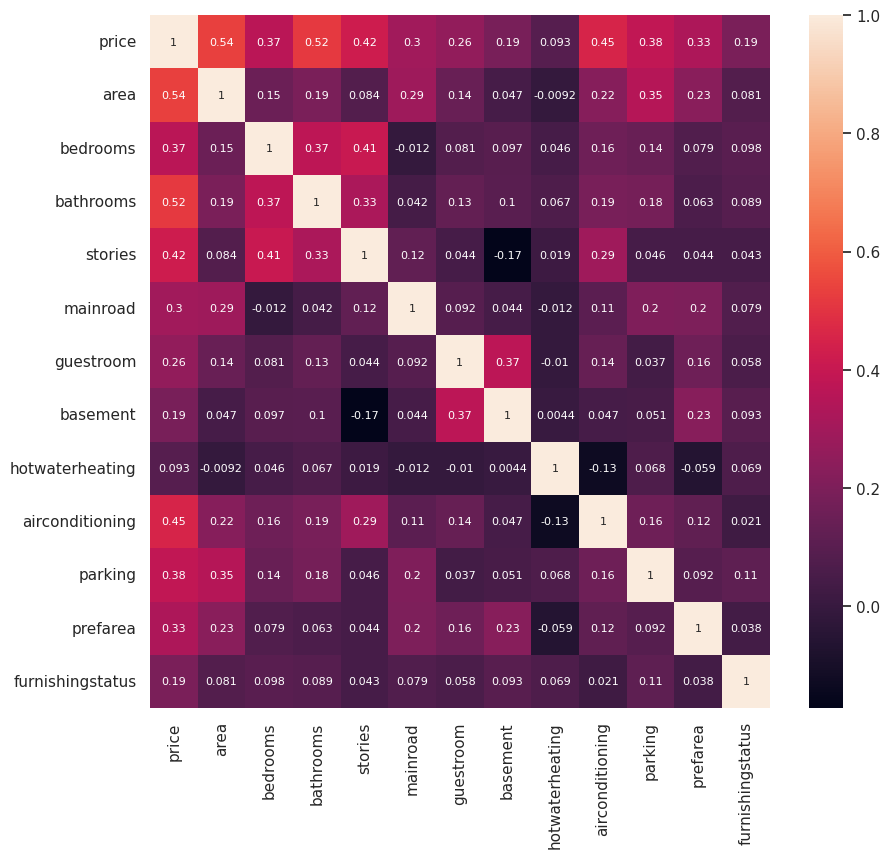

In [89]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(), annot=True, annot_kws ={"size":8})

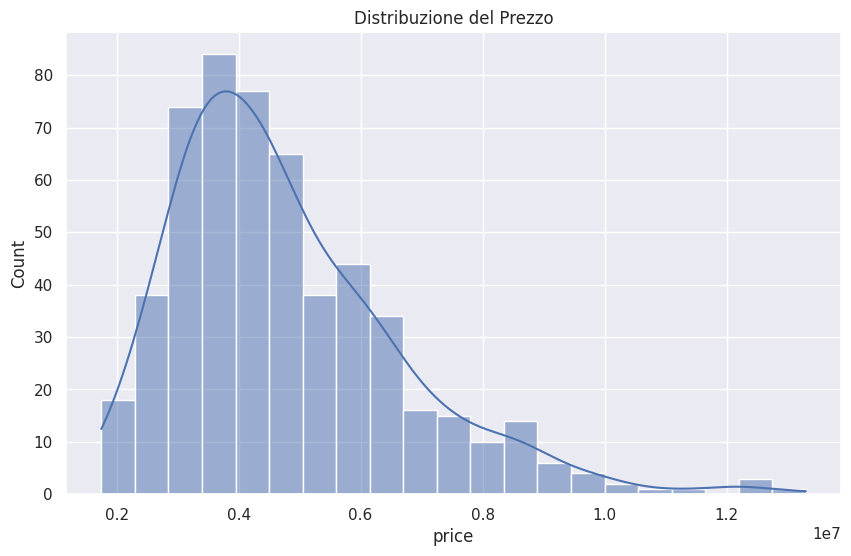

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribuzione del Prezzo')
plt.show()

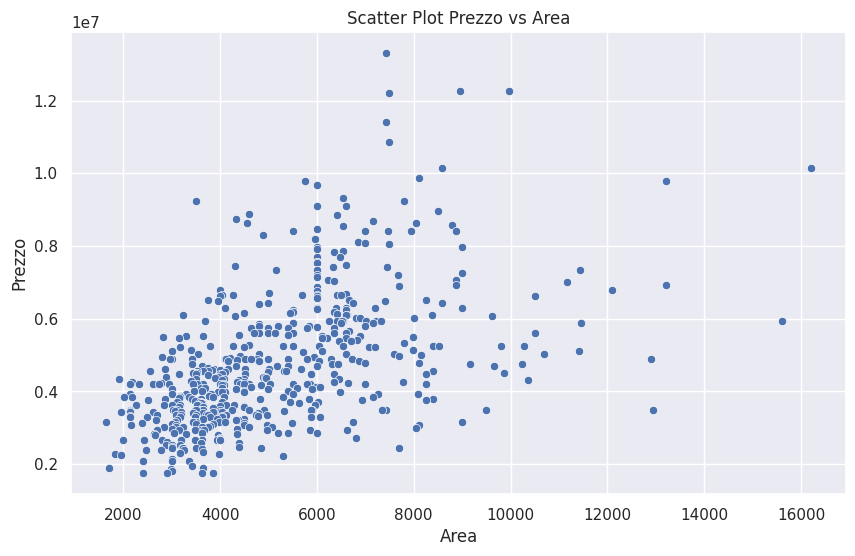

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['area'], y=df['price'])
plt.title('Scatter Plot Prezzo vs Area')
plt.xlabel('Area')
plt.ylabel('Prezzo')
plt.show()


In [92]:
# Ridge Regression: Implementazione e addestramento del modello con regolarizzazione Ridge

In [93]:
X=df.drop("price", axis=1).values
X.shape

(545, 12)

In [94]:
y=df["price"].values
y.shape

(545,)

In [95]:
# Creo una funzione di valutazione che utilizzerò per tutti i modelli

In [96]:
def evaluate(model, dataset):
  X, y = dataset
  y_pred = model.predict(X)
  print(f"MSE: {mean_squared_error(y, y_pred):.2f}")
  print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.3f}")
  print(f"R2: {r2_score(y, y_pred):.2f}")

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=RANDOM_SEED)
X_train.shape

(381, 12)

In [98]:
X_test.shape

(164, 12)

In [99]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [100]:
ridge_model = Ridge(alpha=1.)
ridge_model.fit(X_train, y_train)

Ridge()

In [101]:
# Lasso Regression: Implementazione e addestramento del modello con regolarizzazione Lasso

In [102]:
lasso_model=Lasso(alpha=1.)
lasso_model.fit(X_train, y_train)

Lasso()

In [103]:
# Elastic Net Regression: Implementazione e addestramento del modello con regolarizzazione Elastic Net

In [104]:
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=RANDOM_SEED)
elastic_model.fit(X_train, y_train)

ElasticNet(random_state=0)

In [105]:
y_pred = elastic_model.predict(X_test)


In [106]:
# Valutazione delle Performance

In [107]:
# Utilizzo di tecniche di validazione incrociata

In [108]:
ridge_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_rmse_scores = np.sqrt(-ridge_scores)
print("Ridge Cross-Validation RMSE:", ridge_rmse_scores)
print("Media RMSE Ridge:", ridge_rmse_scores.mean())

Ridge Cross-Validation RMSE: [2647419.82811005  984427.83840825  944592.44197872  918382.70722651
 1045942.77384297]
Media RMSE Ridge: 1308153.117913299


In [109]:
lasso_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_rmse_scores = np.sqrt(-lasso_scores)
print("Lasso Cross-Validation RMSE:", lasso_rmse_scores)
print("Media RMSE Lasso:", lasso_rmse_scores.mean())


Lasso Cross-Validation RMSE: [2639984.58110564  988633.76447465  948190.30622395  920826.7741923
 1042286.93466343]
Media RMSE Lasso: 1307984.4721319943


In [110]:
elastic_scores = cross_val_score(elastic_model, X, y, cv=5, scoring='neg_mean_squared_error')
elastic_rmse_scores = np.sqrt(-elastic_scores)
print("Elastic Net Cross-Validation RMSE:", elastic_rmse_scores)
print("Media RMSE Elastic Net:", elastic_rmse_scores.mean())

Elastic Net Cross-Validation RMSE: [3116761.28873544  952548.41003189  849029.26432883  919547.80493076
 1465706.76962214]
Media RMSE Elastic Net: 1460718.7075298124


In [111]:
# Calcolo del Mean Squared Error (MSE) per ciascun modello
# Ho deciso di inserire ulteriori metriche significative (RMSE e R2) oltre quelle richieste per andare più in profondità

In [112]:
# Ridge Regression

In [113]:
evaluate(ridge_model,(X_train, y_train))

MSE: 1204935449596.85
RMSE: 1097695.518
R2: 0.66


In [114]:
evaluate(ridge_model,(X_test, y_test))

MSE: 961436118597.69
RMSE: 980528.489
R2: 0.72


In [115]:
# Lasso Regression

In [116]:
evaluate(lasso_model,(X_train, y_train))

MSE: 1204930725286.43
RMSE: 1097693.366
R2: 0.66


In [117]:
evaluate(lasso_model,(X_test, y_test))

MSE: 961886232398.79
RMSE: 980757.989
R2: 0.72


In [118]:
# Elastic Net Regression

In [119]:
evaluate(elastic_model,(X_train, y_train))

MSE: 1293240227187.34
RMSE: 1137207.205
R2: 0.63


In [120]:
evaluate(elastic_model,(X_test, y_test))

MSE: 1016384763294.28
RMSE: 1008159.096
R2: 0.71


In [121]:
# Confronto della complessità dei modelli valutando il numero di coefficienti non nulli

In [122]:
ridge_non_zero_coefficients = np.sum(ridge_model.coef_ != 0)
lasso_non_zero_coefficients = np.sum(lasso_model.coef_ != 0)
elastic_non_zero_coefficients = np.sum(elastic_model.coef_ != 0)

print(f"Numero di coefficienti non nulli (Ridge): {ridge_non_zero_coefficients}")
print(f"Numero di coefficienti non nulli (Lasso): {lasso_non_zero_coefficients}")
print(f"Numero di coefficienti non nulli (Elastic Net): {elastic_non_zero_coefficients}")

Numero di coefficienti non nulli (Ridge): 12
Numero di coefficienti non nulli (Lasso): 12
Numero di coefficienti non nulli (Elastic Net): 12


In [123]:
# Analisi e confronto dei risultati dei vari metodi di regolarizzazione

In [124]:
# Confrontando le performance dei modelli Ridge, Lasso ed Elastic Net utilizzando la validazione incrociata
# e la valutazione diretta sui set di training e test ne deriva che:
#
# Ridge e Lasso hanno mostrato risultati molto simili, leggermente migliori di Elastic Net.
# Ridge e Lasso sembrerebbero generalizzare meglio sul set di nuovi dati.
#
# Tutti e tre i modelli hanno mostrato una buona capacità di generalizzazione, con performance
# migliori sul set di test rispetto al set di training. Questo è un segnale positivo, indica che
# non c'è un forte overfitting.
#
# Errore di previsione:
# L'RMSE è elevato per tutti i modelli, quindi le previsioni presentano un margine di errore importante.
# Si potrebbero esplorare modelli più complessi oppure migliorare le features utilizzate.
#
# Selezione delle feature (Lasso ed Elastic Net):
# Lasso ed Elastic Net non hanno eliminato variabili, mantenendo tutti i 12 coefficienti non nulli.
#
# Prossimi passi possibili:
# Ottimizzazione degli iperparametri
# Considerare altri modelli

In [125]:
# Creazione di grafici per visualizzare e confrontare le performance dei modelli

In [126]:
# Ridge Regression

In [127]:
sns.set_theme()
train_sizes_abs, train_scores, test_scores = learning_curve(
    Ridge(alpha=10.),
    X,
    y,
    random_state=RANDOM_SEED
)


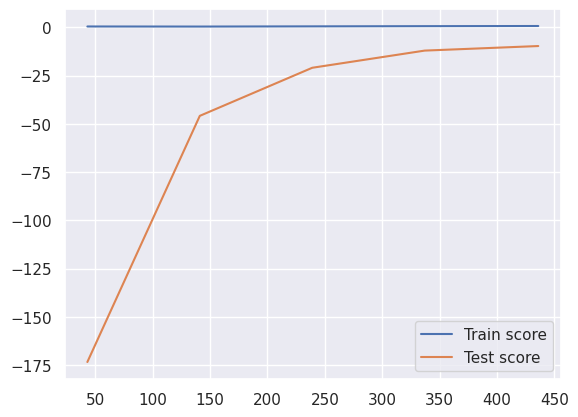

In [128]:
plt.plot(train_sizes_abs, train_scores.mean(axis=1), label="Train score")
plt.plot(train_sizes_abs, test_scores.mean(axis=1), label="Test score")
plt.legend()
plt.show()

In [129]:
# Lasso Regression

In [130]:
sns.set_theme()
train_sizes_abs, train_scores, test_scores = learning_curve(
    Lasso(alpha=10.),
    X,
    y,
    random_state=RANDOM_SEED
)


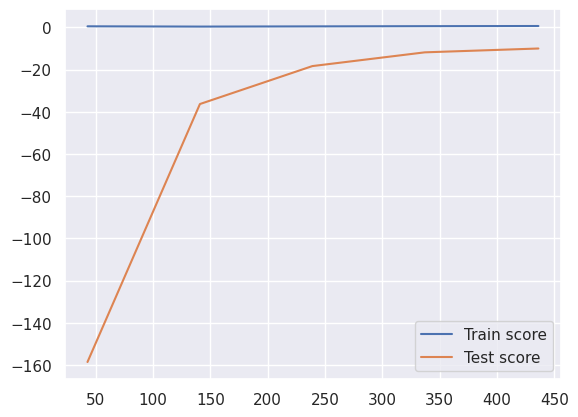

In [131]:
plt.plot(train_sizes_abs, train_scores.mean(axis=1), label="Train score")
plt.plot(train_sizes_abs, test_scores.mean(axis=1), label="Test score")
plt.legend()
plt.show()

In [132]:
# Elastic Net Regression

In [133]:
sns.set_theme()
train_sizes_abs, train_scores, test_scores = learning_curve(
    ElasticNet(alpha=10.),
    X,
    y,
    random_state=RANDOM_SEED
)


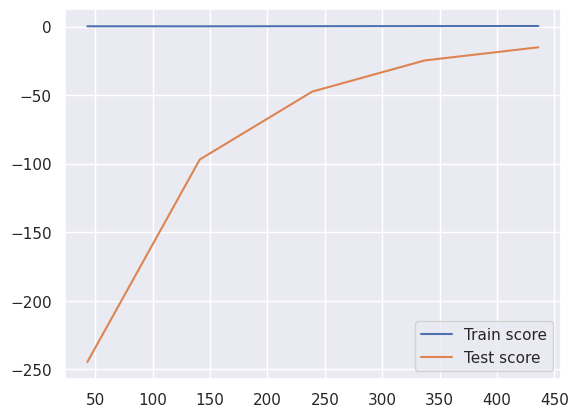

In [134]:
plt.plot(train_sizes_abs, train_scores.mean(axis=1), label="Train score")
plt.plot(train_sizes_abs, test_scores.mean(axis=1), label="Test score")
plt.legend()
plt.show()

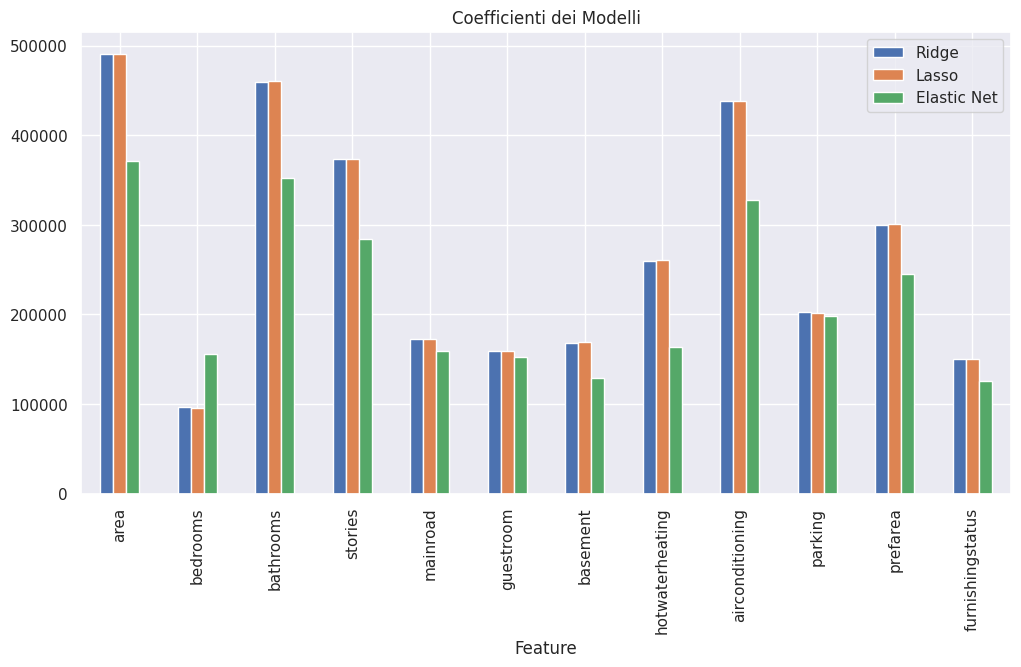

In [135]:
coef_df = pd.DataFrame({
    "Feature": df.drop("price", axis=1).columns,
    "Ridge": ridge_model.coef_,
    "Lasso": lasso_model.coef_,
    "Elastic Net": elastic_model.coef_,
})
coef_df.set_index("Feature").plot(kind='bar', figsize=(12,6), title="Coefficienti dei Modelli")
plt.grid(True)
plt.show()

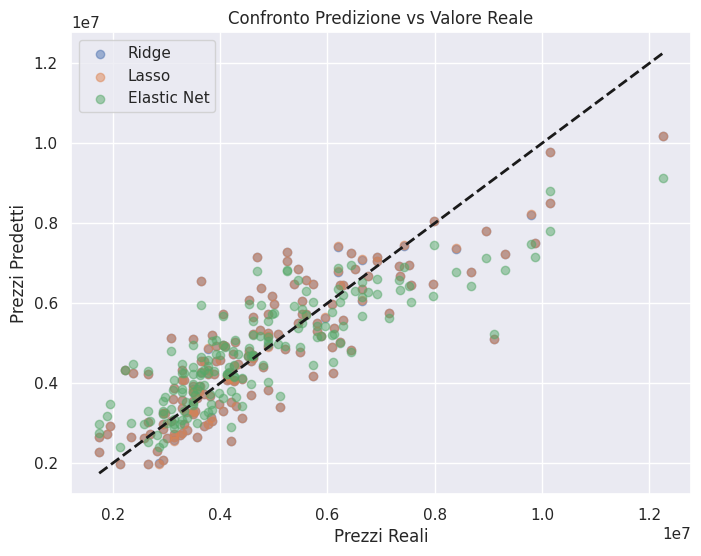

In [136]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, ridge_model.predict(X_test), alpha=0.5, label='Ridge')
plt.scatter(y_test, lasso_model.predict(X_test), alpha=0.5, label='Lasso')
plt.scatter(y_test, elastic_model.predict(X_test), alpha=0.5, label='Elastic Net')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Prezzi Reali")
plt.ylabel("Prezzi Predetti")
plt.title("Confronto Predizione vs Valore Reale")
plt.legend()
plt.grid(True)
plt.show()

In [137]:
# Visualizzazione della distribuzione dei residui per valutare l'adeguatezza del modello

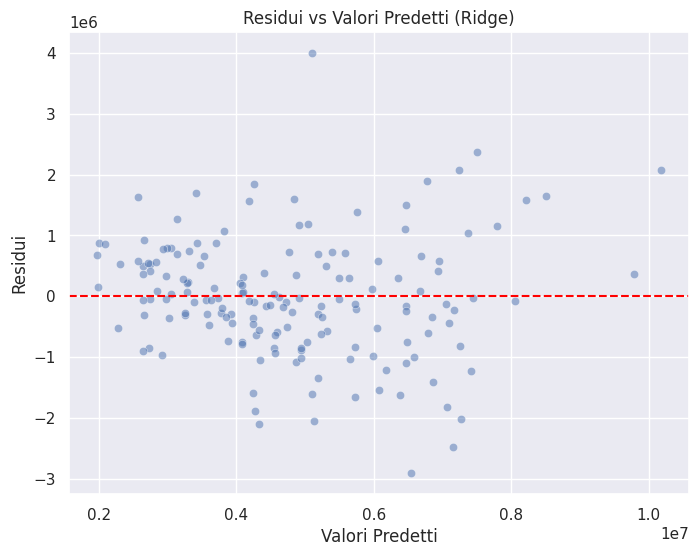

In [138]:
y_pred = ridge_model.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valori Predetti")
plt.ylabel("Residui")
plt.title("Residui vs Valori Predetti (Ridge)")
plt.grid(True)
plt.show()

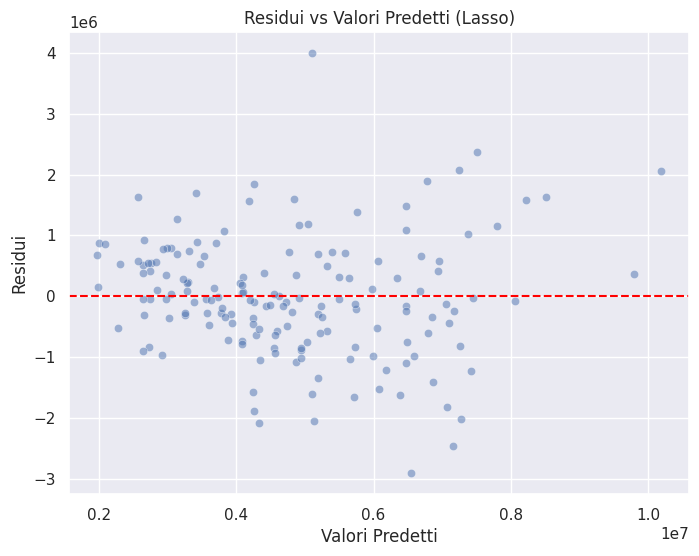

In [140]:
y_pred = lasso_model.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valori Predetti")
plt.ylabel("Residui")
plt.title("Residui vs Valori Predetti (Lasso)")
plt.grid(True)
plt.show()

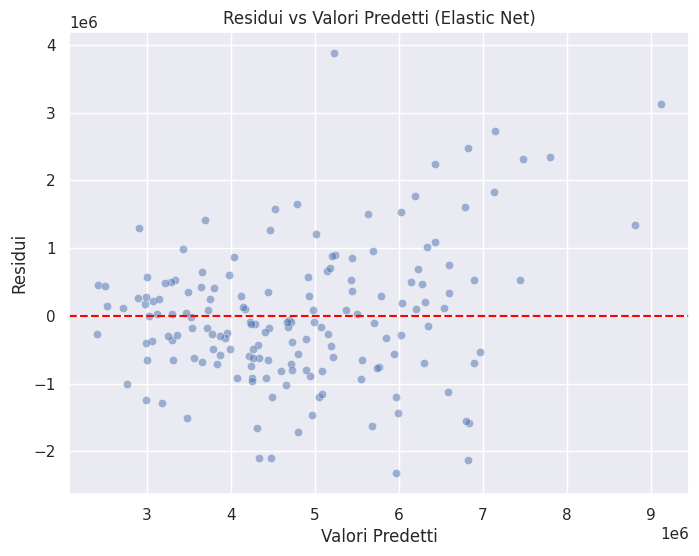

In [141]:
y_pred = elastic_model.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valori Predetti")
plt.ylabel("Residui")
plt.title("Residui vs Valori Predetti (Elastic Net)")
plt.grid(True)
plt.show()

In [142]:
# Provo a migliorare i modelli, ottimizzando gli iperparametri tramite Grid Search

In [143]:
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)
print("Migliori iperparametri per Ridge:", grid_search_ridge.best_params_)
print("Miglior score (neg_MSE) per Ridge:", grid_search_ridge.best_score_)
best_ridge_model = grid_search_ridge.best_estimator_
y_pred_ridge_best = best_ridge_model.predict(X_test)
mse_ridge_best = mean_squared_error(y_test, y_pred_ridge_best)
r2_ridge_best = r2_score(y_test, y_pred_ridge_best)
print("MSE sul test set (Ridge ottimizzato):", mse_ridge_best)
print("R2 sul test set (Ridge ottimizzato):", r2_ridge_best)

Migliori iperparametri per Ridge: {'alpha': 10.0}
Miglior score (neg_MSE) per Ridge: -1297867427817.4731
MSE sul test set (Ridge ottimizzato): 958023427085.2965
R2 sul test set (Ridge ottimizzato): 0.7238150196903927


In [144]:
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)
print("Migliori iperparametri per Lasso:", grid_search_lasso.best_params_)
print("Miglior score (neg_MSE) per Lasso:", grid_search_lasso.best_score_)
best_lasso_model = grid_search_lasso.best_estimator_
y_pred_lasso_best = best_lasso_model.predict(X_test)
mse_lasso_best = mean_squared_error(y_test, y_pred_lasso_best)
r2_lasso_best = r2_score(y_test, y_pred_lasso_best)
print("MSE sul test set (Lasso ottimizzato):", mse_lasso_best)
print("R2 sul test set (Lasso ottimizzato):", r2_lasso_best)

Migliori iperparametri per Lasso: {'alpha': 0.001}
Miglior score (neg_MSE) per Lasso: -1301414799589.9438
MSE sul test set (Lasso ottimizzato): 961887081406.0996
R2 sul test set (Lasso ottimizzato): 0.7227011812785694


In [146]:
param_grid_elasticnet = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'l1_ratio': np.arange(0.0, 1.01, 0.1)
}
elastic_net = ElasticNet()
grid_search_elasticnet = GridSearchCV(elastic_net, param_grid_elasticnet, cv=5, scoring='neg_mean_squared_error')
grid_search_elasticnet.fit(X_train, y_train)
print("Migliori iperparametri per Elastic Net:", grid_search_elasticnet.best_params_)
print("Miglior score (neg_MSE) per Elastic Net:", grid_search_elasticnet.best_score_)
best_elasticnet_model = grid_search_elasticnet.best_estimator_
y_pred_elasticnet_best = best_elasticnet_model.predict(X_test)
mse_elasticnet_best = mean_squared_error(y_test, y_pred_elasticnet_best)
r2_elasticnet_best = r2_score(y_test, y_pred_elasticnet_best)
print("MSE sul test set (Elastic Net ottimizzato):", mse_elasticnet_best)
print("R2 sul test set (Elastic Net ottimizzato):", r2_elasticnet_best)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.678e+14, tolerance: 9.961e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.933e+14, tolerance: 1.095e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

Migliori iperparametri per Elastic Net: {'alpha': 0.1, 'l1_ratio': np.float64(0.1)}
Miglior score (neg_MSE) per Elastic Net: -1295854330381.7937
MSE sul test set (Elastic Net ottimizzato): 953769680424.3763
R2 sul test set (Elastic Net ottimizzato): 0.7250413163597368
